# Predicting iris class

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

Loading data

In [2]:
df=pd.read_csv('iris.csv')

In [3]:
df.head(5)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

checking for null values

In [5]:
df.isnull().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Class           0
dtype: int64

checking range of data in different columns

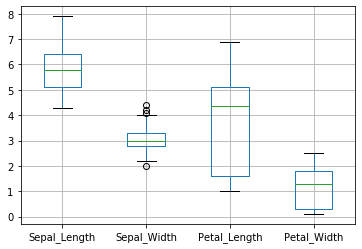

In [6]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000283F8329648>,
      dtype=object)

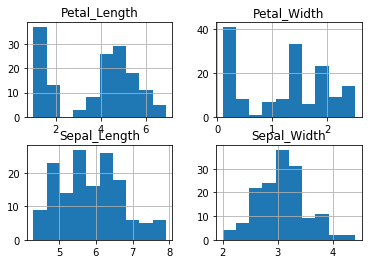

In [7]:
df.hist()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Handling categorical column-'Class'

Machine learning models work on numerical values

In [9]:
from sklearn.preprocessing import LabelEncoder
Class=LabelEncoder()
df['Class_n']=Class.fit_transform(df['Class'])

In [10]:
#checking which class got which value
column_values = df[["Class", "Class_n"]].values.ravel()
unique_values =  pd.unique(column_values)
print(unique_values)

['Iris-setosa' 0 'Iris-versicolor' 1 'Iris-virginica' 2]


In [11]:
df=df.drop(["Class"],axis='columns')

# Correlation Matrix

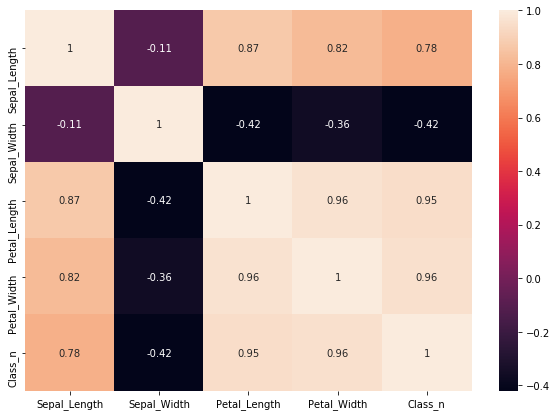

In [12]:
corrMatrix=df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix,annot=True)
plt.show()

Creating new dataframes

In [13]:
df_inputs=df.drop(["Class_n"],axis='columns')
df_target=df["Class_n"]

# Training and Testing dataset

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_inputs,df_target,test_size=0.2,random_state=10)

LogisticRegression model

In [15]:
from sklearn.linear_model import LogisticRegression
model_logistic= LogisticRegression()
model_logistic.fit(X_train,y_train)
model_logistic.score(X_test,y_test)

1.0

SVC model

In [16]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9666666666666667

DecisionTreeClassifier model

In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9333333333333333

RandomForestClassifier model

In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

1.0

KNeighborsClassifier model

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.975

# logistic regression is the best Suited for Iris dataset

In [20]:
predict=model_logistic.predict(X_test)
actual=y_test

In [21]:
actual.shape

(30,)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predict,actual)
cm

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  7]], dtype=int64)

Text(51.0, 0.5, 'actual')

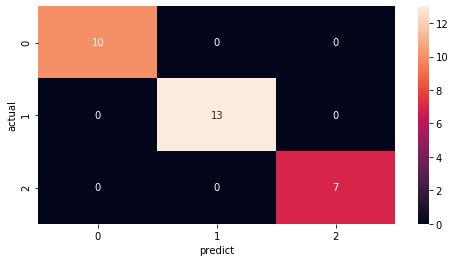

In [23]:
plt.figure(figsize = (8,4))
sns.heatmap(cm, annot=True)
plt.xlabel('predict')
plt.ylabel('actual')


In the above heatmap we can see that all the predicted values are correct

# Prediction

0 - Iris-setosa,  1-Iris-versicolor,  2-Iris-virginica 

In [24]:
model_logistic.predict([[5,3,1.4,0.2]])

array([0])